In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
# 设置绘图样式
# plt.style.use("classic")

Matplotlib 的使用跟开发环境有关，简单来说，就是有三种开发环境，分别是脚本、IPython Shell 和 Jupyter Notebook。

**在脚本中画图**

如果在一个脚本中使用 Matplotlib，那么显示图片的时候必须使用 `plt.show()`。`plt.show()` 会启动一个事件循环，并找到当前可用的图形对象，然后打开一个或多个交互式窗口显示图形。

注意：一个 Python 会话（session） 中只能使用一次 `plt.show()`，因此通常都把它放在脚本的最后。多个 `plt.show()` 命令会导致难以预料的显示异常，应该尽量避免。

**在 IPython Shell 中画图**

在 IPython Shell 中交互式地使用 Matplotlib 画图需要在 IPython 启动 Matplotlib 模式就可以使用它。为了启用这个模式，需要在启动 IPython 后使用 `%matplotlib` 魔法命令：

```Python
%matplotlib
import matplotlib.pyplot as plt
```

此后地任何 plt 命令都会自动打开一个图形窗口，增加新地命令，图形就会更新。有一些变化（例如改变已经画好地线条属性）不会自动及时更新；对于这些变化，可以使用 `plt.draw()` 强制更新。在 IPython shell 中启动 Matplotlib 模式之后，就不需要使用 `plt.show()` 了。

**在 Jupyter Notebook 中画图**

Jupyter Notebook 进行交互式画图与使用 IPython shell 类似，也需要使用 `%matplotlib` 命令。可以将图形直接嵌在页面中，有两种展示形式：

- `%matplotlib notebook` 会在 Notebook 中启动交互式图形
- `%matplotlib inline` 会在 Notebook 中启动静态图形【经测试，不写的话，这是默认模式】

No handles with labels found to put in legend.


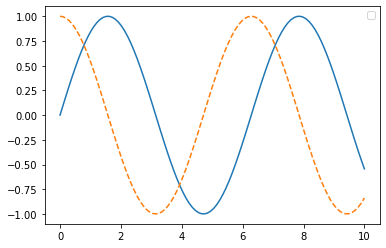

In [3]:
import numpy as np
x=np.linspace(0,10,100)
# 在 Matplotlib 中，figure（plt.Figure的一个实例）可以被看成是一个能够容纳各种坐标轴、图形、文字和标签的容器
fig=plt.figure()
plt.plot(x,np.sin(x),"-")
plt.plot(x,np.cos(x),"--")
# 下面函数会将每条线的标签与其风格、颜色自动匹配
plt.legend()

## Matplotlib 画图接口

Matplotlib 有两种画图接口：
- 便捷的 MATLAB 风格接口
- 面向对象接口

### MATLAB 风格接口

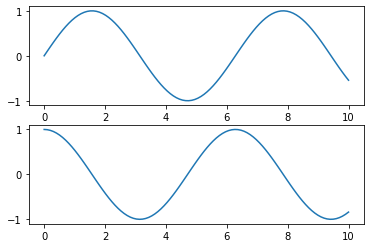

In [9]:
# 创建图形
plt.figure()
# 创建子图
plt.subplot(2,1,1) # 行间距、列间距、子图编号
plt.plot(x,np.sin(x))

plt.subplot(2,1,2)
plt.plot(x,np.cos(x))

### 面向对象接口

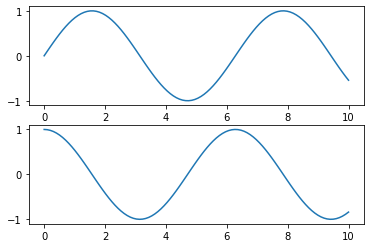

In [10]:
# 先创建图形网格
# ax 是一个包含两个 Axes 对象的数组
fig, ax = plt.subplots(2)
# 在每个对象上调用 plot() 方法
ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))

### 简易线型图

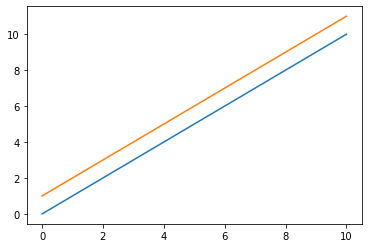

In [15]:
# fig = plt.figure()
"""
axes（plt.Axes 类的一个实例）是一个带有刻度和标签的矩形，最终会包含所有可视化的图形元素，简单来说就是一个坐标轴类
如果想在一个坐标轴上创建多条线，可以重复调用 plot 命令
"""
ax = plt.axes()
ax.plot(x,x+0)
ax.plot(x,x+1)
# 下面函数会将每条线的标签与其风格、颜色自动匹配
plt.legend()

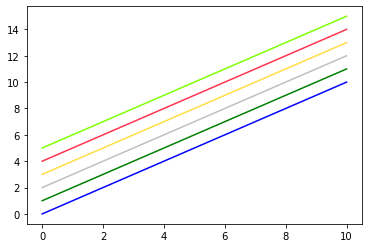

In [16]:
"""
调整图形：线条的颜色与风格
    通过使用 color 参数来修改颜色，它支持各种颜色值的字符串
    如果不指定颜色，Matplotlib 就会为多条线自动循环使用一组默认的颜色
"""
ax = plt.axes()
ax.plot(x,x+0,color="blue")          # 标准颜色名称
ax.plot(x,x+1,color="g")             # 缩写颜色代码（rgbcmyk）
ax.plot(x,x+2,color="0.75")          # 范围在0~1的灰度值
ax.plot(x,x+3,color="#FFDD44")       # 十六进制（RRGGBB，00~FF）
ax.plot(x,x+4,color=(1.0,0.2,0.3))   # RGB元组，范围在0~1
ax.plot(x,x+5,color="chartreuse")    # HTML颜色名称

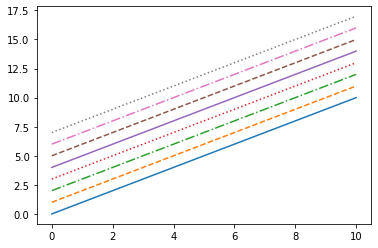

In [13]:
"""
通过 linestyle 调正线条的风格
"""
ax = plt.axes()
ax.plot(x, x+0, linestyle="solid")
ax.plot(x, x+1, linestyle="dashed")
ax.plot(x, x+2, linestyle="dashdot")
ax.plot(x, x+3, linestyle="dotted")
# 简写的形式
ax.plot(x, x+4, linestyle="-")  # 实线
ax.plot(x, x+5, linestyle="--") # 虚线 
ax.plot(x, x+6, linestyle="-.") #点画线
ax.plot(x, x+7, linestyle=":")  #实点线

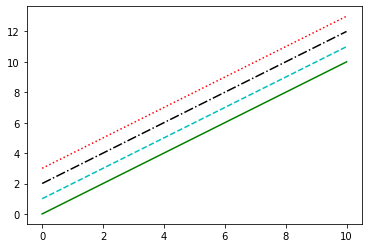

In [14]:
"""
还有一种更简洁的方式，可以直接将 linestyle 和 color 编码组合起来，作为 `plt.plot()` 函数的一个非关键字参数使用
"""
ax = plt.axes()
ax.plot(x,x+0,"-g")  # 绿色实线
ax.plot(x,x+1,"--c") # 青色虚线
ax.plot(x,x+2,"-.k") # 黑色点划线
ax.plot(x,x+3,":r")  # 红色实点线

(-10.0, 10.0)

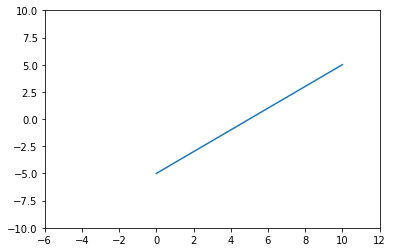

In [19]:
"""
调整图形：坐标轴上下限
    Matplotlib 会自动根据用户的图形选择最合适的坐标轴上下限，但若需要自定义坐标轴的上下限可以通过 `plt.xlim()` 和 `plt.ylim()` 方法来进行操作
"""
ax = plt.axes()
ax.plot(x,x-5)
ax.set_xlim(-6,12)
ax.set_ylim(-10,10)

(-6.0, 12.0, -10.0, 10.0)

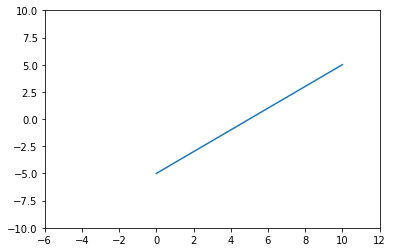

In [21]:
"""
plt.axis() 方法可以用一行代码（[xmin,xmax,ymin,ymax]）来设置 x 和 y 的限值，而且它还可以按照图形的内容自动收缩坐标轴，不留空白区域
"""
plt.plot(x,x-5)
plt.axis([-6,12,-10,10])

Text(0, 0.5, 'y')

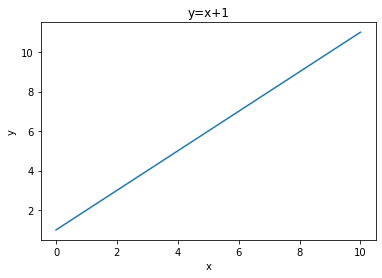

In [5]:
"""
设置图形标签
"""
plt.plot(x,x+1)
plt.title("y=x+1")
plt.xlabel("x")
plt.ylabel("y")

### 简易散点图

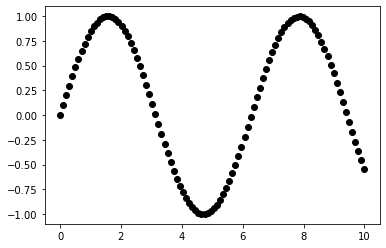

In [6]:
"""
用 plt.plot 画散点图
函数的第三个参数是一个字符，表示图形符号的类型。所有的缩写形式可以在 plt.plot 文档中查到，也可以参考 Matplotlib 的在线文档
"""
plt.plot(x,np.sin(x),"o",color="black")

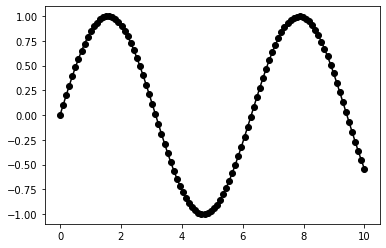

In [7]:
"""
散点图可以和线条、颜色组合起来
"""
plt.plot(x,np.sin(x),'-ok')

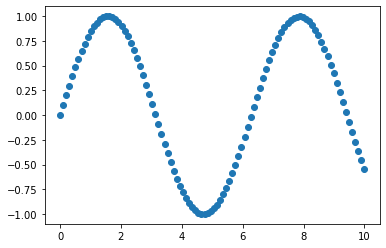

In [8]:
"""
用 plt.scatter 画散点图

scatter 画散点图具有更高的灵活性，可以单独控制每个散点与数据匹配，也可以让每个散点具有不同的属性（大小、表面颜色、边框颜色等）
"""
plt.scatter(x,np.sin(x),marker='o')

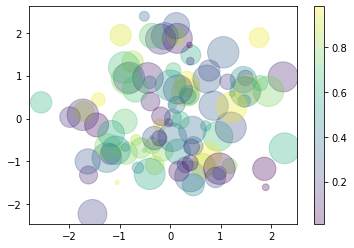

In [9]:
"""
示例：创建一个随机散点图
"""
rng=np.random.RandomState(0)
x=rng.randn(100)
y=rng.randn(100)
colors=rng.rand(100)
sizes=1000*rng.rand(100)

plt.scatter(x,y,c=colors,s=sizes,alpha=0.3,cmap="viridis")
plt.colorbar() #显示颜色条